In [17]:
import networkx as nx
from ego_graph_dataset import select_active_graph
from tqdm import tqdm
import pandas as pd
import os
from utils import scores2coalition, PlotUtils
from torch_geometric.utils import to_networkx, from_networkx
import matplotlib.pyplot as plt
import utils
from gspan_mine.gspan_mining.config import parser
from gspan_mine.gspan_mining.main import main

In [18]:
RULE = 23
DATASET = 'mutagenicity'
METRIC = 'entropy'
NODE_SELECTION = 'fixed_size'

In [15]:
# Build the graph.data file for a given rule
def build_graph_data(dataset='mutagenicity' ,rule=23, metric='entropy', node_selection='fixed_size'):
    graphs = select_active_graph(f'/home/elouan/epita/lre/gnn_explainability/src/activ_ego/mutag_{rule}labels_egos.txt', 2,0,[])
    skipped_index = []
    with open(f'results/{dataset}_{rule}_{metric}_{node_selection}.data', 'w+') as f:
        for i in tqdm(range(3490)):
            graph = to_networkx(graphs[i], to_undirected=True, node_attrs=['center', 'x'])
            df_node_score = pd.read_csv(os.path.join("./results/mutagenicity/gcn/gstarx",
                             f"result_{dataset}_{rule}_{i}.csv"))
            if df_node_score is None or len(df_node_score) == 0:
                skipped_index.append(i)
                continue
            node_score = df_node_score[metric].values
            coalition = scores2coalition(node_score, sparsity=0.5, fixed_size=True, size=3)
            # If the node that has the label 'center' to True in the graph is not in the coalition, add it
            for node in graph.nodes():
                if graph.nodes[node]['center'] and node not in coalition:
                    coalition.append(node)
            # Select the subgraph induce by the coalition
            subgraph = graph.subgraph(coalition)
            f.write(f't # {i}\n')
            for node in subgraph.nodes():
                f.write(f'v {int(node)} {graph.nodes[node]["x"]}\n')
            for edge in subgraph.edges():
                f.write(f'e {int(edge[0])} {int(edge[1])} 0\n')
    print(f"Skipped {len(skipped_index)} graphs")

In [16]:
build_graph_data(DATASET, RULE, METRIC, NODE_SELECTION)

Number of graphs: 3490


100%|██████████| 3490/3490 [00:04<00:00, 773.87it/s]

Skipped 67 graphs



Support: 3414


/home/elouan/epita/lre/gnn_explainability/src/gspan_mine/gspan_mining/gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._read_graphs()


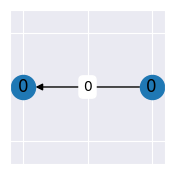

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

/home/elouan/epita/lre/gnn_explainability/src/gspan_mine/gspan_mining/gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._read_graphs()


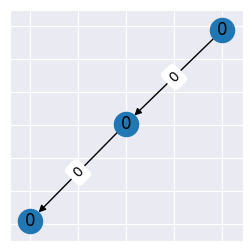

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 173, 174, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 2

/home/elouan/epita/lre/gnn_explainability/src/gspan_mine/gspan_mining/gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._read_graphs()


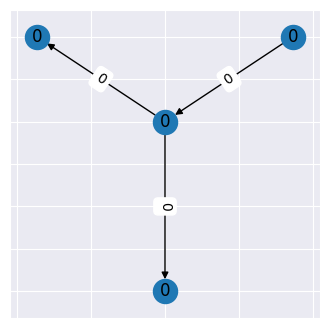

where: [1, 2, 3, 2050, 2051, 6, 2056, 2057, 10, 2062, 15, 16, 2063, 2064, 19, 2065, 2070, 2071, 2072, 2073, 28, 2080, 2081, 36, 2089, 45, 50, 2099, 2100, 53, 2101, 55, 2105, 2106, 62, 63, 65, 66, 69, 72, 80, 81, 85, 86, 87, 2133, 2134, 90, 2135, 2141, 97, 98, 2145, 2146, 2154, 2155, 112, 116, 118, 120, 2168, 2169, 125, 128, 133, 134, 135, 2181, 2182, 138, 139, 2183, 146, 2195, 2196, 149, 150, 2197, 2199, 2200, 2201, 2203, 2204, 158, 159, 2207, 2209, 162, 163, 164, 165, 166, 167, 168, 169, 2211, 2217, 2220, 2221, 2223, 176, 177, 2224, 2225, 2226, 189, 190, 2237, 2238, 198, 2246, 2247, 201, 2249, 2250, 2255, 2256, 209, 2260, 2262, 2263, 224, 225, 2273, 231, 2280, 233, 234, 236, 2287, 2288, 241, 243, 2293, 246, 2294, 248, 254, 256, 257, 258, 259, 2307, 2310, 2317, 2318, 2319, 2320, 2321, 274, 2322, 2323, 2324, 2325, 2326, 282, 2331, 284, 285, 286, 287, 288, 289, 290, 291, 292, 2332, 2333, 2334, 2335, 297, 298, 299, 2339, 2340, 302, 2342, 2343, 2344, 2353, 2354, 311, 312, 313, 314, 315, 31

In [32]:
# Run gspan mining on the graph.data file
min_support = 1000
args_str = f'-s {min_support} -p True ./results/{DATASET}_{RULE}_{METRIC}_{NODE_SELECTION}.data'
FLAGS, _ = parser.parse_known_args(args=args_str.split())
gs = main(FLAGS)

In [30]:
gs.graphs

{0: <gspan_mine.gspan_mining.graph.Graph at 0x7fb552b714c0>,
 1: <gspan_mine.gspan_mining.graph.Graph at 0x7fb553f954f0>,
 2: <gspan_mine.gspan_mining.graph.Graph at 0x7fb553f956a0>,
 3: <gspan_mine.gspan_mining.graph.Graph at 0x7fb553f95ca0>,
 4: <gspan_mine.gspan_mining.graph.Graph at 0x7fb552ea59a0>,
 5: <gspan_mine.gspan_mining.graph.Graph at 0x7fb552ea53d0>,
 6: <gspan_mine.gspan_mining.graph.Graph at 0x7fb55013a130>,
 7: <gspan_mine.gspan_mining.graph.Graph at 0x7fb55013a5e0>,
 8: <gspan_mine.gspan_mining.graph.Graph at 0x7fb55013a310>,
 9: <gspan_mine.gspan_mining.graph.Graph at 0x7fb554624160>,
 10: <gspan_mine.gspan_mining.graph.Graph at 0x7fb554624130>,
 11: <gspan_mine.gspan_mining.graph.Graph at 0x7fb554624700>,
 12: <gspan_mine.gspan_mining.graph.Graph at 0x7fb554624550>,
 13: <gspan_mine.gspan_mining.graph.Graph at 0x7fb5545c05b0>,
 14: <gspan_mine.gspan_mining.graph.Graph at 0x7fb5545c0280>,
 15: <gspan_mine.gspan_mining.graph.Graph at 0x7fb5545c0a60>,
 16: <gspan_mine.g